Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


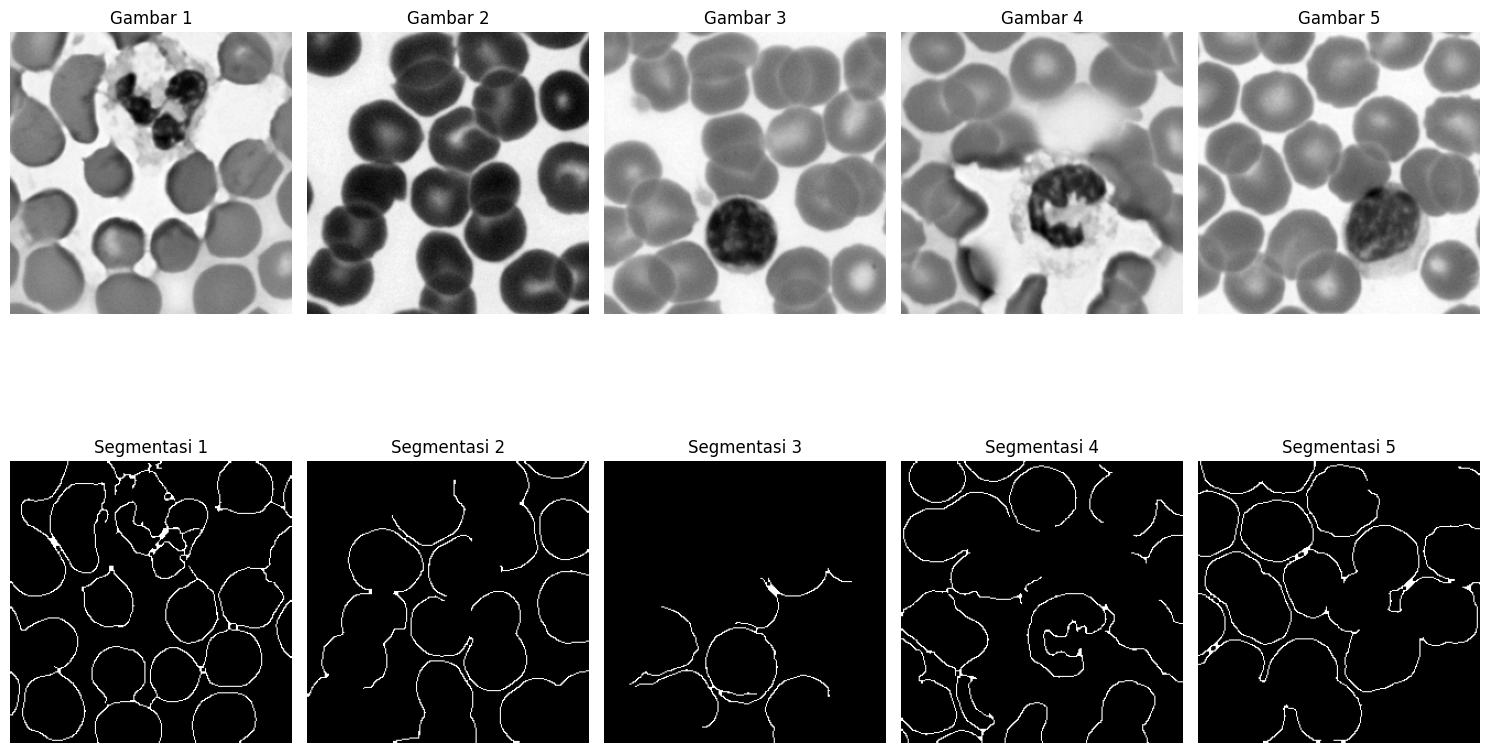

In [6]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

# 1️⃣ Mount Google Drive
drive.mount('/content/drive')

# 2️⃣ Path folder dataset di Google Drive (UBAH SESUAI LOKASI ANDA)
dataset_path = "/content/drive/MyDrive/Pengenalan pola/archive2/images"

# 3️⃣ Ambil daftar file gambar
image_files = sorted(os.listdir(dataset_path))[:5]  # Ambil 5 gambar pertama

# 4️⃣ Looping untuk membaca dan memproses gambar
plt.figure(figsize=(15, 10))
for i, img_name in enumerate(image_files):
    img_path = os.path.join(dataset_path, img_name)

    # Membaca gambar dalam mode grayscale
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    # 5️⃣ Gaussian Blur untuk mengurangi noise
    blurred = cv2.GaussianBlur(img, (5, 5), 0)

    # 6️⃣ Canny Edge Detection
    edges = cv2.Canny(blurred, threshold1=50, threshold2=150)

    # 7️⃣ Morphological Operations (Closing) untuk memperbaiki tepi
    kernel = np.ones((3,3), np.uint8)
    edges_morph = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)

    # 8️⃣ Menampilkan hasil dalam subplot
    plt.subplot(2, 5, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(f'Gambar {i+1}')
    plt.axis('off')

    plt.subplot(2, 5, i+6)
    plt.imshow(edges_morph, cmap='gray')
    plt.title(f'Segmentasi {i+1}')
    plt.axis('off')

# 9️⃣ Tampilkan semua gambar
plt.tight_layout()
plt.show()
